In [1]:
from imputation.hetvae.src.train import HETVAE
from toy_dataset import data_utils
import utils


import numpy as np
import torch
import torch.optim as optim
import models
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [27]:
# load my own synthetic data (Josh)
from toy_dataset import data_utils
name = 'toydataset_50000'
path = data_utils.datasets_dict[name]
dataset = data_utils.ToyDataDf(path)
dataset.create_mcar_missingness(0.2, -1)
model_args = '--niters 2000 --lr 0.0001 --batch-size 128 --rec-hidden 16 --latent-dim 64 --embed-time 128 --enc-num-heads 1 --num-ref-points 16 --n 2000 --dataset toy --seed 0 --norm --sample-tp 0.5 --k-iwae 1'.split()
train_dataloader, validation_dataloader = dataset.prepare_mtan(model_args=model_args, batch_size=256)

# modify, so that my own (Josh) data is used instead of the HETVAE author's data
train_loader = train_dataloader
val_loader = validation_dataloader
test_loader = validation_dataloader
union_tp = utils.union_time(train_loader)
dim = 4

--
Created MCAR missing data, but without missingness in columns Index(['id', 'time'], dtype='object')
missingness_rate: 0.2,	missingness_value: -1
Missing values: 0 out of 4000000 (0.0%) (!excluding aforementioned columns)
Data values in entire dataframe is 6000000 (shape: (1000000, 6))
Using batch size 256 for training and validation set.
parameters encoder/decoder: 44610 83178
Logging and saving model to:  ./imputation/runs/mTANtoy/2023.01.18-11.59.25/


In [28]:
ground_truth, train_batch = data_utils.get_batch_train_ground_truth(train_dataloader, dataset, batch_num=24)

print(ground_truth.shape)
print(train_batch.shape)

(256, 50, 4)
torch.Size([256, 50, 9])


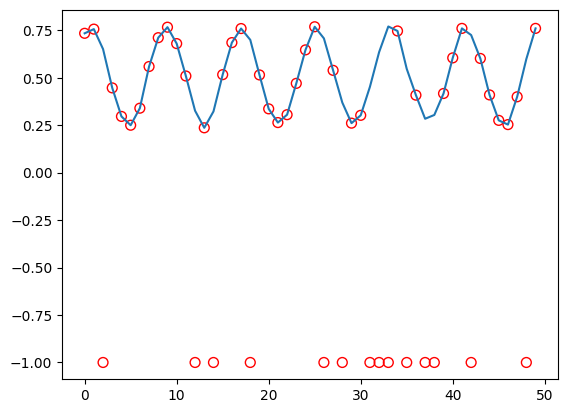

In [29]:
sample = 5
feature = 2
gt = ground_truth[sample, :, feature]
train = train_batch[sample, :, feature]
time = train_batch[sample, :, -1]

fig = plt.figure()
plt.plot(time, gt)
plt.scatter(time, train, s=50, facecolors='None', edgecolors='red')


